In [4]:
import keras
import numpy as np
from keras.applications import vgg16

In [5]:
vgg_model = vgg16.VGG16(weights='imagenet')

In [108]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from PIL import Image
filename = 'test39.jpg'

In [109]:
orginal = load_img(filename)
x3image=load_img(filename,target_size=(672,672))
image = load_img(filename, target_size=(224, 224))

PIL image size (224, 224)


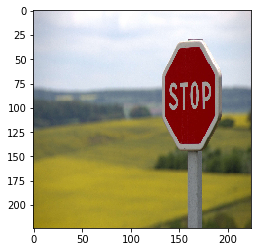

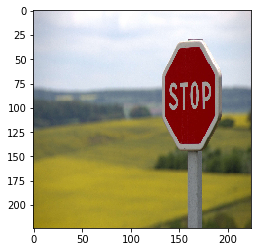

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


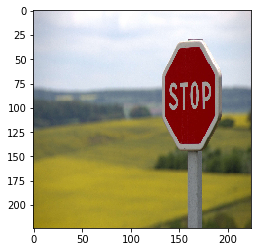

In [110]:
print('PIL image size',image.size)
plt.imshow(image)
plt.show()
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)

numpy_image = img_to_array(image)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [111]:
processed_image = vgg16.preprocess_input(image_batch.copy())
predictions = vgg_model.predict(processed_image)
label = decode_predictions(predictions)
print(label) 

[[('n06794110', 'street_sign', 0.4208544), ('n03891332', 'parking_meter', 0.3911091), ('n03000134', 'chainlink_fence', 0.03309676), ('n03710193', 'mailbox', 0.02732412), ('n04604644', 'worm_fence', 0.014393939)]]


In [112]:
def clean(a):
    main_str=a[0][0][1]
    main_prob=a[0][0][2]
    return([main_str,main_prob])

In [113]:
upper=0;
lower=224;
a=[]
for i in range(3):
    right=224; 
    left=0;
    for j in range(3):
        a.append((left,upper,right,lower))
        left=left+224;
        right=right+224;        
    upper+=224
    lower+=224   

In [114]:
def predict(imae):
    numpy_imae = img_to_array(imae)
    imae_batch = np.expand_dims(numpy_imae, axis=0)
    processed_imae = vgg16.preprocess_input(imae_batch.copy())
    predictions = vgg_model.predict(processed_imae)
    label = decode_predictions(predictions)
    return(label)


In [115]:
main_pred=clean(predict(image))[0]
main_prob=clean(predict(image))[1]

In [116]:
for i in a:
    b=clean(predict(x3image.crop(i)))
    
    print(b)

['parachute', 0.063069165]
['ice_lolly', 0.10871596]
['street_sign', 0.45106435]
['bald_eagle', 0.029338537]
['street_sign', 0.11183433]
['street_sign', 0.5896914]
['rapeseed', 0.06599986]
['rapeseed', 0.27265435]
['rapeseed', 0.08084401]


[[('n03891332', 'parking_meter', 0.6210606),
  ('n06794110', 'street_sign', 0.33530238),
  ('n03000134', 'chainlink_fence', 0.011819742),
  ('n03710193', 'mailbox', 0.010085106),
  ('n02841315', 'binoculars', 0.0030863325)]]

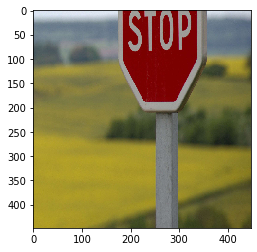

In [117]:
plt.imshow(x3image.crop((224,224,672,672)))
x3cropped=x3image.crop((224,224,672,672)).resize((224,224))
predict(x3cropped)

In [118]:

pro_image=orginal.resize(((orginal.size[0]//224)*224,(orginal.size[1]//224)*224))

In [119]:
orginal.size[0]

3840

In [120]:
pro_a=[]
upper=0
lower=pro_image.size[1]//4
while(lower<=pro_image.size[1]):
    left=0
    right=pro_image.size[0]//6
    while(right<=pro_image.size[0]):
        pro_a.append((left,upper,right,lower))
        left+=(pro_image.size[0]//3)//4
        right+=(pro_image.size[0]//3)//4
    upper+=(pro_image.size[1]//2)//4
    lower+=(pro_image.size[1]//2)//4   

In [121]:
clean(predict(pro_image.crop(pro_a[14]).resize((224,224))))

['albatross', 0.021953782]

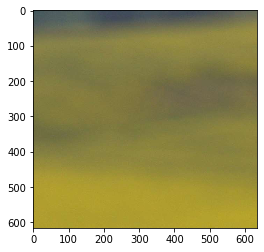

In [122]:
plt.imshow(pro_image.crop(pro_a[46]))

In [123]:
a=0
pro_data=[]
prob_dat=[]
for i in pro_a:
    b=clean(predict(pro_image.crop(i).resize((224,224))))
    b.append(a)
    print(b," index ",a)
    a+=1
    pro_data.append(b)
    prob_dat.append(b[1])

['parachute', 0.08047726, 0]  index  0
['parachute', 0.07773433, 1]  index  1
['parachute', 0.07101417, 2]  index  2
['parachute', 0.07472738, 3]  index  3
['parachute', 0.05960965, 4]  index  4
['parachute', 0.07088209, 5]  index  5
['flagpole', 0.11779094, 6]  index  6
['digital_clock', 0.09669118, 7]  index  7
['digital_clock', 0.10847306, 8]  index  8
['bobsled', 0.04083201, 9]  index  9
['schooner', 0.056266278, 10]  index  10
['albatross', 0.026387492, 11]  index  11
['albatross', 0.016128952, 12]  index  12
['albatross', 0.017213417, 13]  index  13
['albatross', 0.021953782, 14]  index  14
['albatross', 0.021115884, 15]  index  15
['albatross', 0.024298407, 16]  index  16
['matchstick', 0.088420734, 17]  index  17
['street_sign', 0.41735885, 18]  index  18
['street_sign', 0.72249335, 19]  index  19
['parking_meter', 0.14607333, 20]  index  20
['wine_bottle', 0.06863259, 21]  index  21
['albatross', 0.11162891, 22]  index  22
['albatross', 0.16338524, 23]  index  23
['albatross',

In [124]:
pro_data_ref_num=[]
for  i in pro_data:
    if(i[0]==main_pred and i[1]>=0.65*max(prob_dat)):
        print(i)
        pro_data_ref_num.append(i[2])
        
    

['street_sign', 0.72249335, 19]
['street_sign', 0.60019374, 42]


In [125]:
fle=[]
fri=[]
flo=[]
fup=[]
for i in pro_data_ref_num:
    print(pro_a[i])
    fle.append(pro_a[i][0])
    fri.append(pro_a[i][2])
    flo.append(pro_a[i][3])
    fup.append(pro_a[i][1])

(2536, 308, 3170, 924)
(2853, 924, 3487, 1540)


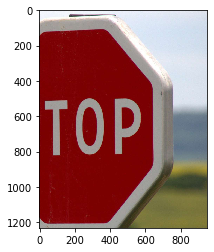

In [126]:
plt.imshow(pro_image.crop((min(fle),min(fup),max(fri),max(flo))))

In [154]:
import cv2

In [155]:
pro_image.save('1.jpg')

In [156]:
img=cv2.imread('1.jpg',cv2.IMREAD_COLOR)

In [157]:
cv2.rectangle(img,(min(fle),min(fup)),(max(fri),max(flo)),(25,0,0),10)

array([[[201, 187, 189],
        [200, 186, 188],
        [200, 186, 188],
        ...,
        [216, 202, 214],
        [216, 202, 214],
        [216, 202, 214]],

       [[201, 187, 189],
        [200, 186, 188],
        [200, 186, 188],
        ...,
        [216, 202, 214],
        [216, 202, 214],
        [216, 202, 214]],

       [[201, 187, 189],
        [200, 186, 188],
        [200, 186, 188],
        ...,
        [216, 202, 214],
        [216, 202, 214],
        [216, 202, 214]],

       ...,

       [[ 16, 131, 151],
        [ 15, 130, 150],
        [ 15, 130, 150],
        ...,
        [ 29,  66,  70],
        [ 28,  65,  69],
        [ 26,  63,  67]],

       [[ 15, 130, 150],
        [ 15, 130, 150],
        [ 15, 130, 150],
        ...,
        [ 29,  66,  70],
        [ 26,  63,  67],
        [ 23,  60,  64]],

       [[ 15, 130, 150],
        [ 15, 130, 150],
        [ 15, 130, 150],
        ...,
        [ 28,  65,  69],
        [ 25,  62,  66],
        [ 22,  59,  63]]

In [158]:
print(max(fle),max(fup)),
print(max(fri),max(flo))

2853 924
3487 1540


In [159]:
font=cv2.FONT_HERSHEY_SIMPLEX

In [162]:
cv2.putText(img,main_pred,(min(fle),min(fup)),font,4,(255,0,0),3,cv2.LINE_AA)

array([[[201, 187, 189],
        [200, 186, 188],
        [200, 186, 188],
        ...,
        [216, 202, 214],
        [216, 202, 214],
        [216, 202, 214]],

       [[201, 187, 189],
        [200, 186, 188],
        [200, 186, 188],
        ...,
        [216, 202, 214],
        [216, 202, 214],
        [216, 202, 214]],

       [[201, 187, 189],
        [200, 186, 188],
        [200, 186, 188],
        ...,
        [216, 202, 214],
        [216, 202, 214],
        [216, 202, 214]],

       ...,

       [[ 16, 131, 151],
        [ 15, 130, 150],
        [ 15, 130, 150],
        ...,
        [ 29,  66,  70],
        [ 28,  65,  69],
        [ 26,  63,  67]],

       [[ 15, 130, 150],
        [ 15, 130, 150],
        [ 15, 130, 150],
        ...,
        [ 29,  66,  70],
        [ 26,  63,  67],
        [ 23,  60,  64]],

       [[ 15, 130, 150],
        [ 15, 130, 150],
        [ 15, 130, 150],
        ...,
        [ 28,  65,  69],
        [ 25,  62,  66],
        [ 22,  59,  63]]

## 

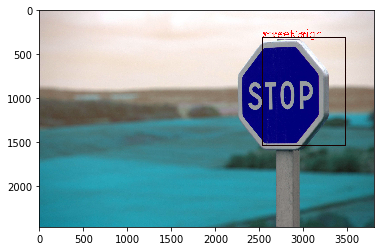

In [163]:
plt.imshow(np.uint8(img))

In [152]:
orginal.size

(3840, 2563)